# Importing the necessary libraries

In [61]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [156]:
plt.rcParams['figure.figsize'] = 18, 10
sns.set()

In [157]:
np.random.seed(100)

# Read Data set

In [158]:
df = pd.read_csv('iris.csv')

In [159]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [160]:
# Drop the column
df = df.drop(['Id'], axis=1)

In [161]:
df.shape

(150, 5)

In [240]:
# getting some more information on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [241]:
# obtaining a statistical description of the dataset
df.describe().transpose().all

<bound method DataFrame.all of                count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5>

# Histograms

### A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.

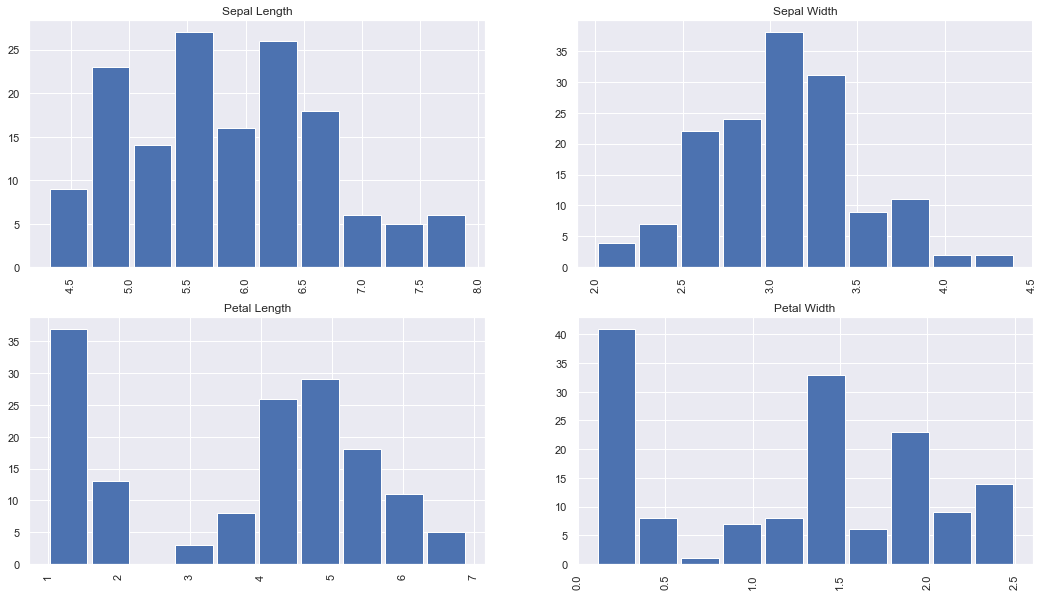

In [239]:
# Plot All columns using histogram
plt.subplot(2,2,1)
plt.hist(df['SepalLengthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Sepal Length')

plt.subplot(2,2,2)
plt.hist(df['SepalWidthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Sepal Width')

plt.subplot(2,2,3)
plt.hist(df['PetalLengthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Petal Length')

plt.subplot(2,2,4)
plt.hist(df['PetalWidthCm'], rwidth=0.9)
plt.xticks(rotation=90)
plt.title('Petal Width')

plt.show()

# Rug Plot

### A rug plot is a compact way of illustrating the marginal distributions of a variable along x and y. Positions of the data points along x and y are denoted by tick marks, reminiscent of the tassels on a rug. Known Issues: Rug marks are overlaid onto the same axis as the original data.


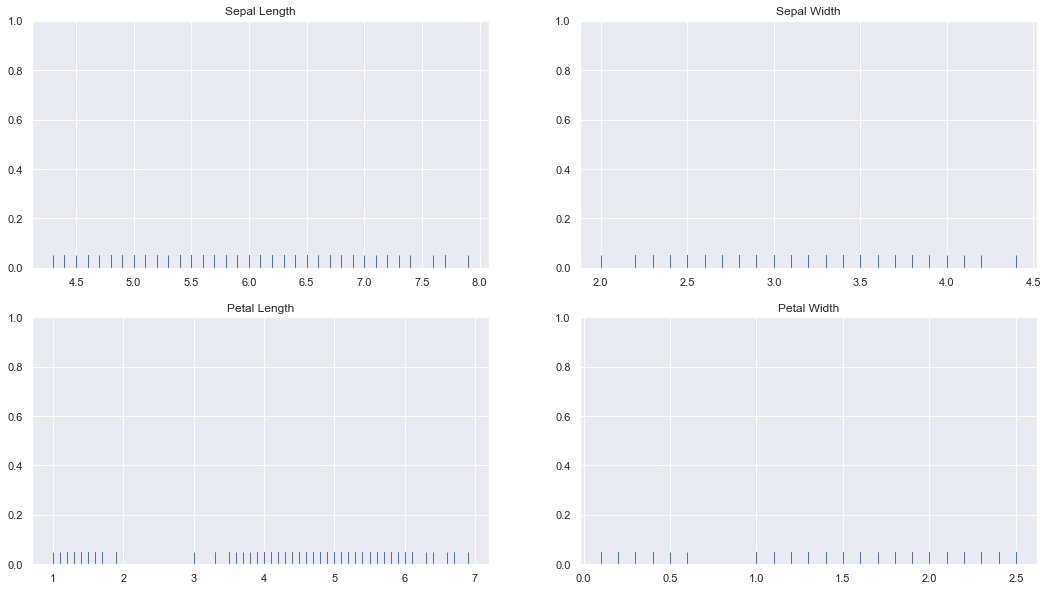

In [72]:
plt.subplot(2,2,1)
sns.rugplot(df['SepalLengthCm'])
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.rugplot(df['SepalWidthCm'])
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.rugplot(df['PetalLengthCm'])
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.rugplot(df['PetalWidthCm'])
plt.title('Petal Width')

plt.show()

# KDE PLOT

###  Kernel Density Estimates. Advertisements. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis. Setting the hist flag to False in distplot will yield the kernel density estimation plot.

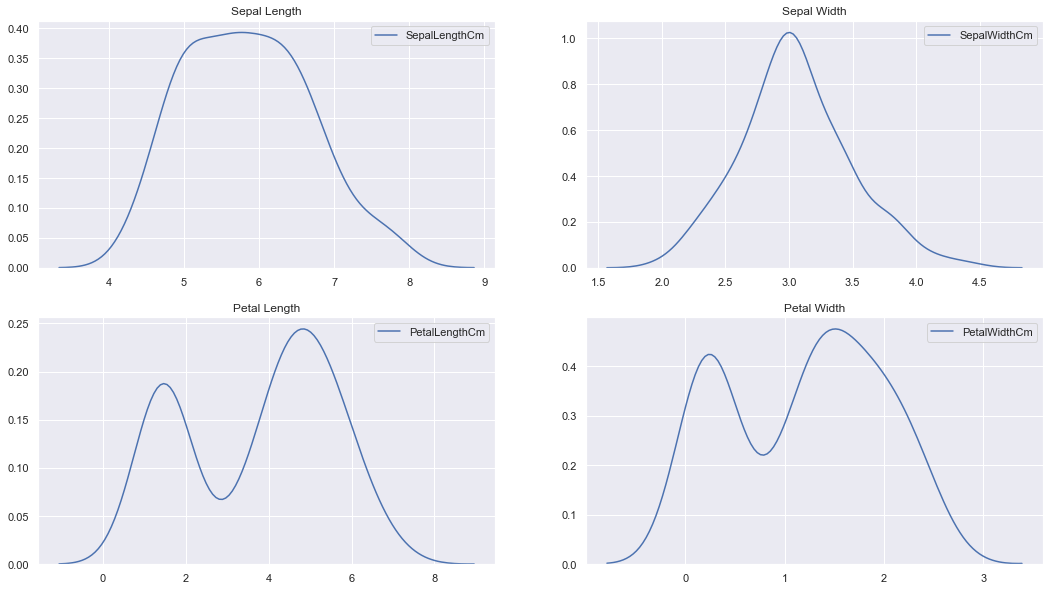

In [73]:
plt.subplot(2,2,1)
sns.kdeplot(df['SepalLengthCm'])
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.kdeplot(df['SepalWidthCm'])
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.kdeplot(df['PetalLengthCm'])
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.kdeplot(df['PetalWidthCm'])
plt.title('Petal Width')

plt.show()

# Dist Plot

### A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions

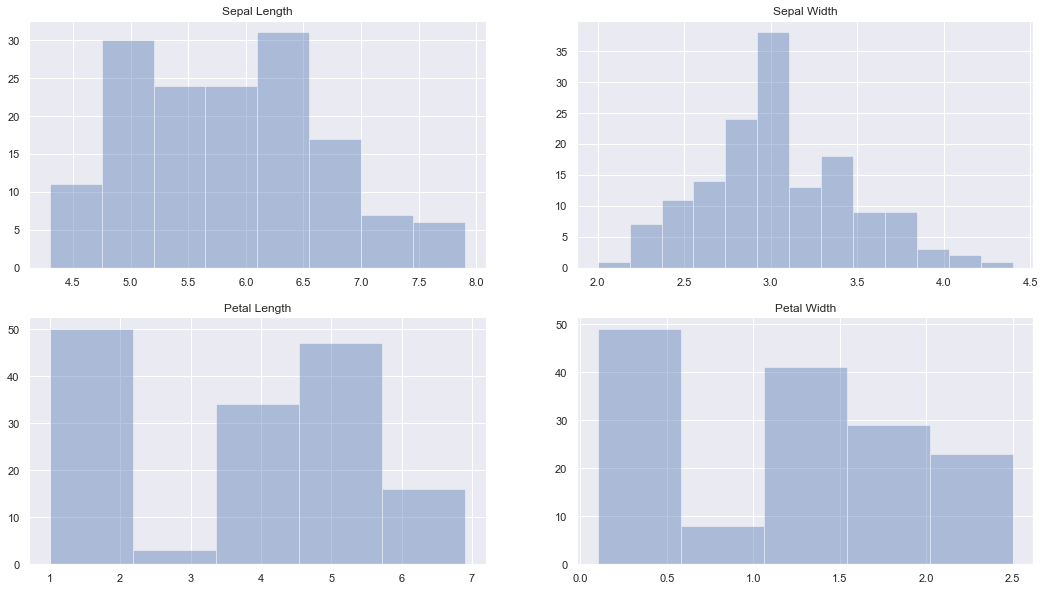

In [74]:
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'].values, kde=False)
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'].values, kde=False)
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'].values, kde=False)
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'].values, kde=False)
plt.title('Petal Width')

plt.show()

# Plot

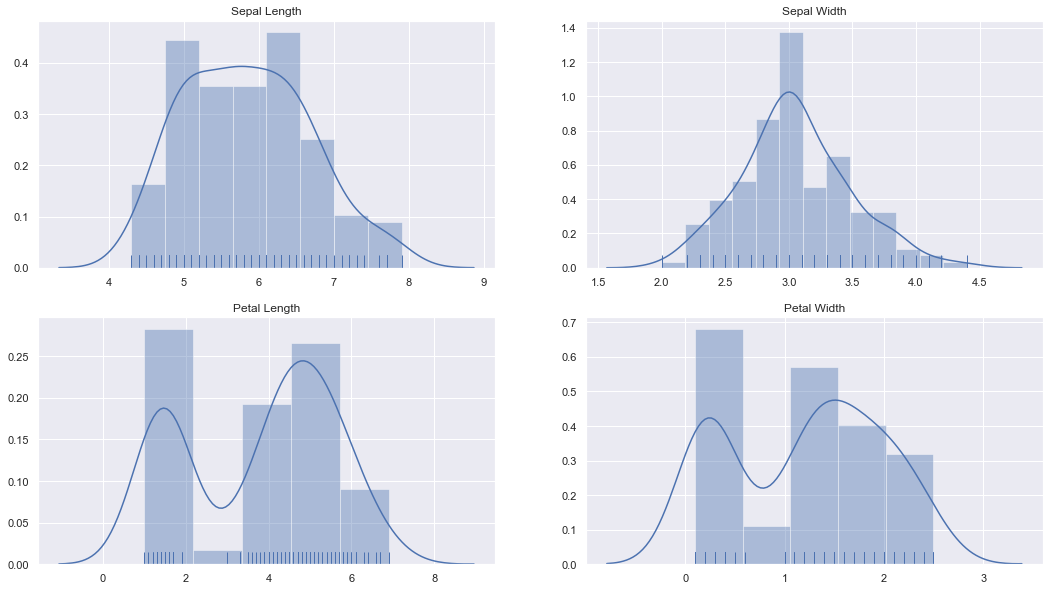

In [75]:
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'].values, rug=True)
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'].values, rug=True)
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'].values, rug=True)
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'].values, rug=True)
plt.title('Petal Width')

plt.show()

# Pair Plot

### Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use

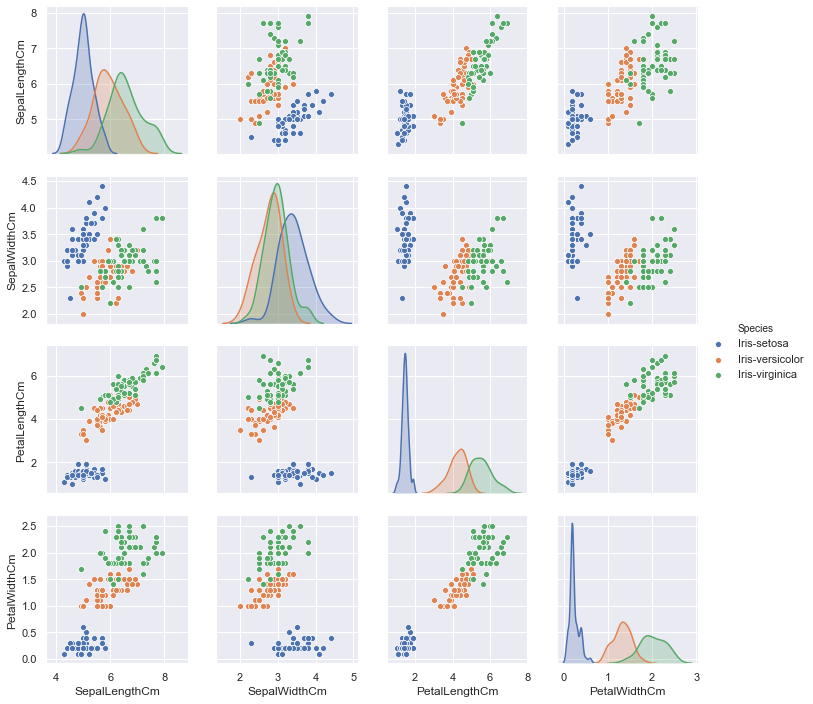

In [76]:
sns.pairplot(df, hue='Species')

# Head Map


###  Heatmap works by collecting the data from a web page. It uses a dark-to-light color scale to display which content of the web page is clicked more or which area gets more attention. For example, the area where viewer clicks the most gets a dark color and light color where the viewer gives no attention.

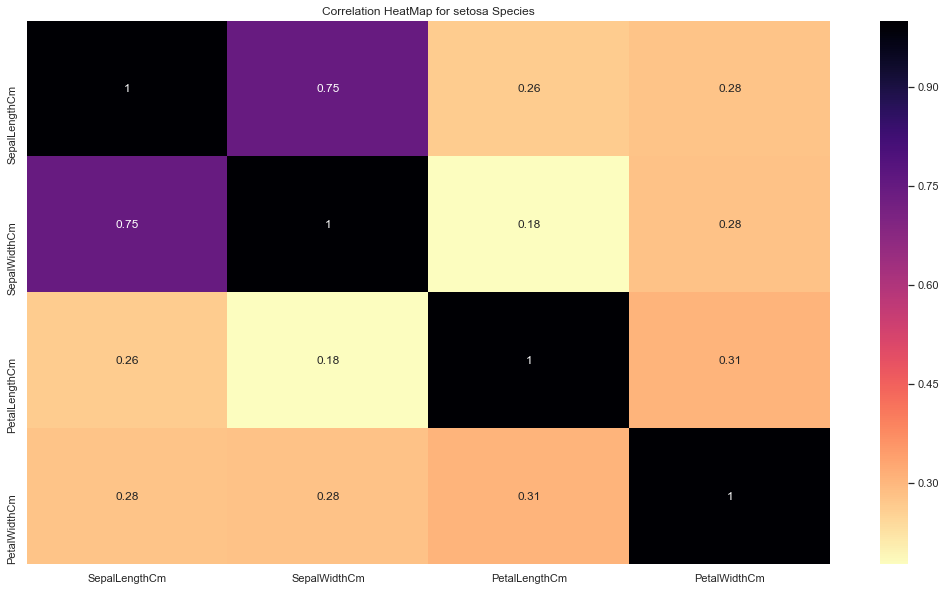

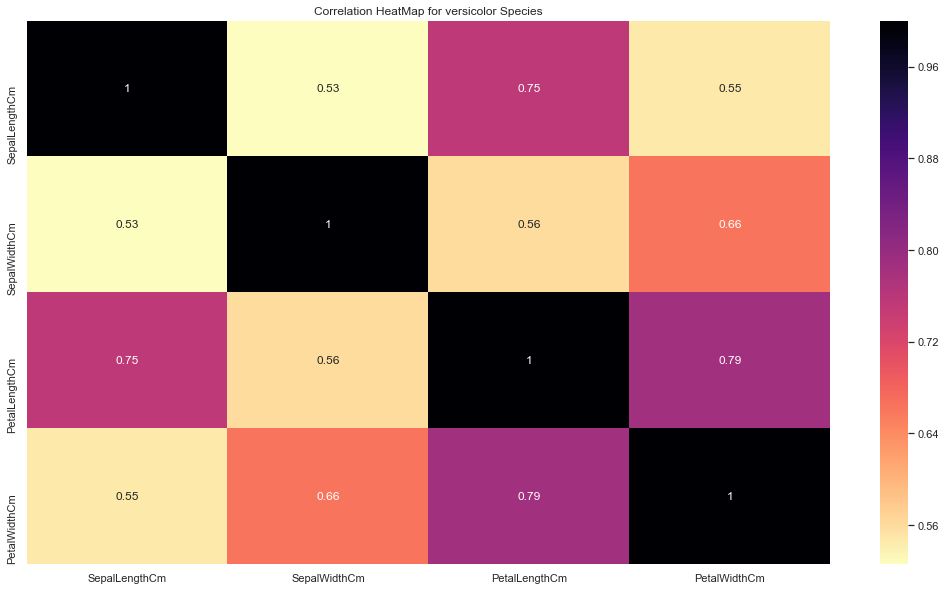

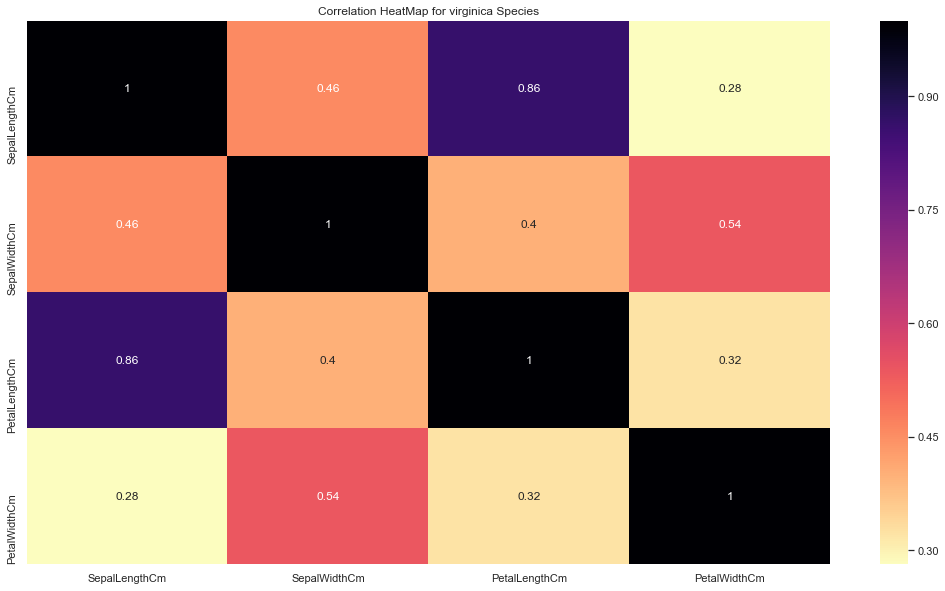

In [77]:
sns.heatmap(df[df['Species']=='Iris-setosa'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for setosa Species')
plt.show()

sns.heatmap(df[df['Species']=='Iris-versicolor'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for versicolor Species')
plt.show()

sns.heatmap(df[df['Species']=='Iris-virginica'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation HeatMap for virginica Species')
plt.show()

# Preparing the Data

In [222]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['Species'].values

In [246]:
#checking the number of rows and columns in the dataset respectively.
x,y = x.shape, y.shape
print(x,y)

(150, 4) (150,)


(150,)

# Label Encode

In [225]:
lbEncoder = LabelEncoder()
y = lbEncoder.fit_transform(y)

# Divide Train_test_split

In [226]:
# splitting our data
x_train, x_test, y_train, y_test = train_test_split(x, y,  train_size=0.8, random_state=42)

# Train Model

In [242]:
#Making the instance of  DecisionTree by calling  DecisionTreeClassifier() without changing any parameters
tree = DecisionTreeClassifier()

In [228]:
#Getting all the default parameters of DecisionTreeClassifier().
tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [243]:
# fitting our model to the training data
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Pridiction

In [245]:
#Total predicted values from the dataset
y_pred = tree.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Accuracy Score

In [232]:
#Accuracy of test data is 100%
accuracy_score(y_test, y_pred)

1.0

# Confusion matrix

In [244]:
# the evaluation metrics for classification model
# we get 100% accuracy
print('Classification Report of the Model is as follows:\n')
print(classification_report(y_test, y_pred))

print('Confusion matrix: \n')
print(confusion_matrix(y_test, y_pred))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix: 

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Plot_Tree

### Plot a decision tree.The sample counts that are shown are weighted with any sample_weights that might be present.The visualization is fit automatically to the size of the axis. Use the figsize or dpi arguments of plt.figure to control the size of the rendering.

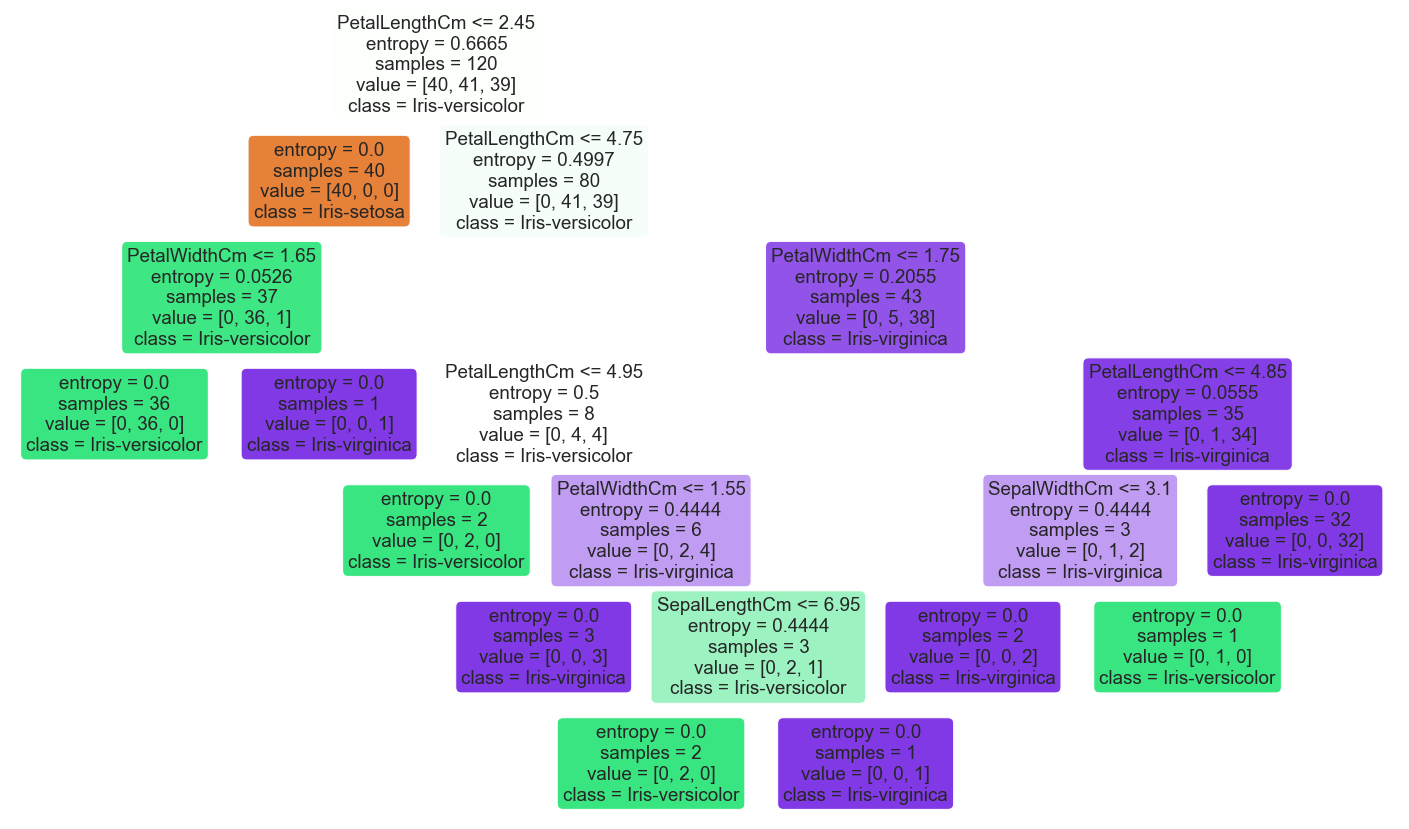

In [237]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))

tree_image = plot_tree(tree,feature_names=df.columns,class_names=df['Species'].unique().tolist(),
                       precision=4,label="all",filled=True,rounded=True)
# plt.savefig('showTree')
plt.show()